# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
import sklearn
import pickle

In [2]:
# load data from database
engine = create_engine('sqlite:///.\data\DisasterResponse.db')
df = pd.read_sql_table("DisasterResponse" , con=engine)
X = df['message']
y = df.drop(columns= ['id','message','original','genre'])

In [3]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['related',
 'aid_related',
 'weather_related',
 'direct_report',
 'request',
 'other_aid',
 'food',
 'earthquake',
 'storm',
 'shelter']

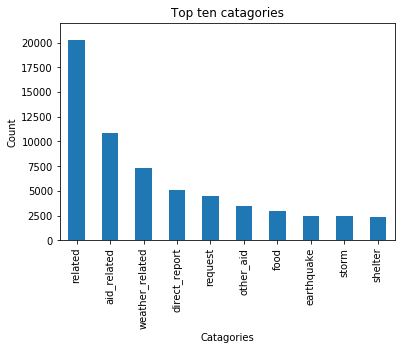

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
#ployclean = y.drop(columns = ['related']).sum().nlargest(10)  #
ployclean = y.sum().nlargest(10)  #
ployclean.plot(kind="bar")
plt.title('Top ten catagories')
plt.ylabel('Count')
plt.xlabel('Catagories')
plt.ylim(0,22000)
list(ployclean.index) 

### 2. Write a tokenization function to process your text data

In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [ ]:
for message in X[:5]:
    tokens = tokenize(message)
    print(message)
    print(tokens, '\n')

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [ ]:
pipeline = Pipeline([('vect', CountVectorizer(tokenizer=tokenize)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultiOutputClassifier(RandomForestClassifier()))])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 45) ;
pipeline.fit(X_train, y_train) ;

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [ ]:
def perf_report(model, X_test, y_test):
    '''
    Function to generate classification report on the model
    Input: Model, test set ie X_test & y_test
    Output: Prints the Classification report
    '''
    y_pred = model.predict(X_test)
    for i, col in enumerate(y_test):
        print(col)
        print(classification_report(y_test[col], y_pred[:, i]))

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
parameters =  {'tfidf__use_idf': (True, False), 
              'clf__estimator__n_estimators': [50, 100], 
              'clf__estimator__min_samples_split': [2, 4]} 

cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
cv.fit(X_train, y_train);

In [ ]:
perf_report(cv, X_test, y_test)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
pipeline_improve = Pipeline([
    ('vect', CountVectorizer()),
    ('best', TruncatedSVD()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier()))
])

In [ ]:
pipeline_improve.fit(X_train, y_train)
perf_report(pipeline_improve, X_test, y_test)

In [ ]:
parameters2 = { 'tfidf__use_idf': (True, False), 
                'clf__estimator__n_estimators': [50, 100],
                'clf__estimator__learning_rate': [1,2] }

In [ ]:
cv2 = GridSearchCV(pipeline_improve, param_grid=parameters2)

In [ ]:
cv2.fit(X_train, y_train)

In [ ]:
perf_report(cv2, X_test, y_test)

In [ ]:
print('sklearn: %s' % sklearn.__version__)

### 9. Export your model as a pickle file

In [ ]:
with open('model.pkl', 'wb') as f:
   pickle.dump(cv2, f)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.